In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

In [7]:
cartography_df = pd.read_csv('./sem-eval-anger-cartography.csv', index_col=0)
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1423360081,When tears r inappropriate: 'This day is holy ...,0.990554,0.008447,0.995434,0.009446,0.008448,0.004566,0,0,0.000000,0.990554,0.008447,1.0,True,1.00
1,1423360082,Hell hath no fury like a bureaucrat scorned. ―...,0.047442,0.050436,0.014618,0.952558,0.050436,0.985382,1,1,0.857143,0.952558,0.050436,1.0,True,1.00
2,1423360083,People’s deepest passions often scare them too...,0.713017,0.243593,0.980038,0.286983,0.243593,0.019962,0,0,0.000000,0.713017,0.243593,1.0,True,1.00
3,1423360084,Being playful as shit😤,0.043532,0.039415,0.033867,0.956468,0.039415,0.966133,1,1,0.571429,0.956468,0.039415,1.0,True,0.75
4,1423360085,@EE your a joke I pay for data when I'm in Spa...,0.082444,0.076341,0.013425,0.917556,0.076342,0.986575,1,1,0.714286,0.917556,0.076342,1.0,True,0.75


In [8]:
cartography_df['agreement_factor'] = cartography_df.apply(lambda row: row.agreement_factor if row.label == 1 else 1 - row.agreement_factor, axis=1)
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label,pred,agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1423360081,When tears r inappropriate: 'This day is holy ...,0.990554,0.008447,0.995434,0.009446,0.008448,0.004566,0,0,1.000000,0.990554,0.008447,1.0,True,1.00
1,1423360082,Hell hath no fury like a bureaucrat scorned. ―...,0.047442,0.050436,0.014618,0.952558,0.050436,0.985382,1,1,0.857143,0.952558,0.050436,1.0,True,1.00
2,1423360083,People’s deepest passions often scare them too...,0.713017,0.243593,0.980038,0.286983,0.243593,0.019962,0,0,1.000000,0.713017,0.243593,1.0,True,1.00
3,1423360084,Being playful as shit😤,0.043532,0.039415,0.033867,0.956468,0.039415,0.966133,1,1,0.571429,0.956468,0.039415,1.0,True,0.75
4,1423360085,@EE your a joke I pay for data when I'm in Spa...,0.082444,0.076341,0.013425,0.917556,0.076342,0.986575,1,1,0.714286,0.917556,0.076342,1.0,True,0.75


In [9]:
len(cartography_df['text_id'].unique())

7408

In [10]:
len(cartography_df)

7408

In [11]:
len(cartography_df)

7408

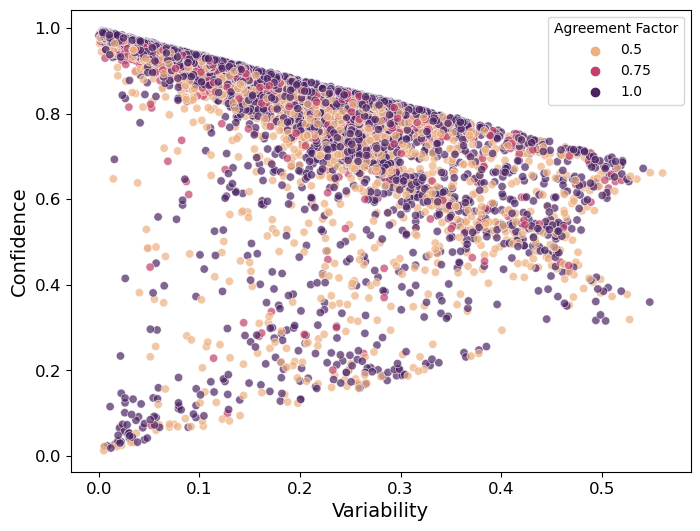

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='agreement_factor_rd', palette='flare', alpha=0.7)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/conf_vs_var_color_agreement_factor.png", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.5 vs. 0.75: Mann-Whitney-Wilcoxon test two-sided, P_val:1.205e-60 U_stat=5.926e+05
0.75 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:6.680e-01 U_stat=2.378e+06
0.5 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:3.622e-86 U_stat=2.833e+06


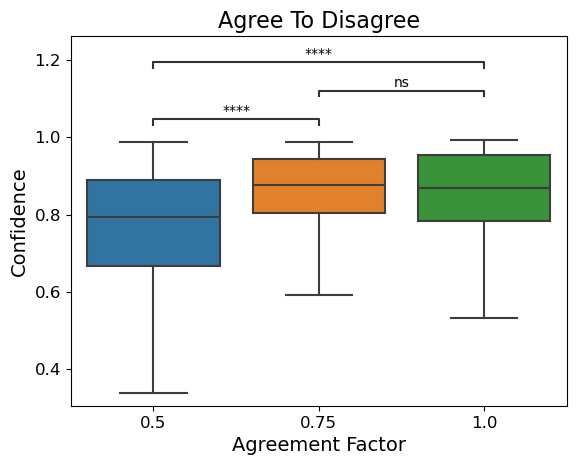

In [14]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False)

pairs=[(0.5, 0.75), (0.75, 1.0), (0.5, 1.0)]

annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')


In [27]:
cartography_df['label_text'] = cartography_df['label'].map({0: 'not anger', 1: 'anger'})

In [28]:
len(cartography_df)

7408

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.5_1 vs. 0.75_1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.205e-60 U_stat=5.926e+05
0.75_1 vs. 1.0_1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.899e-24 U_stat=3.211e+05
0.5_1 vs. 1.0_1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.110e-131 U_stat=3.212e+05


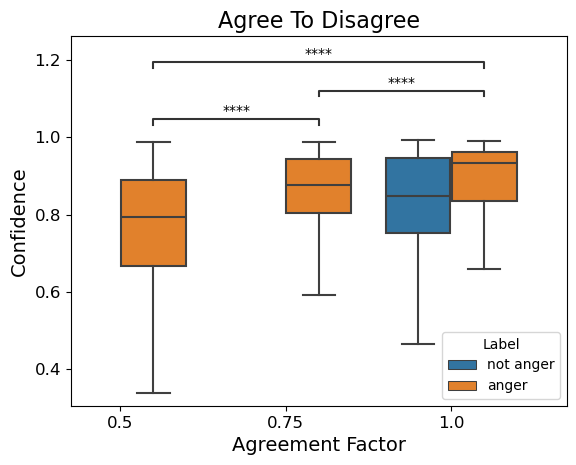

In [29]:
ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False, hue='label_text')


pairs=[ ((0.5, 1), (0.75, 1)), ((0.75, 1), (1.0, 1)), ((0.5, 1), (1.0, 1))]


annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence", hue='label')
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title = 'Label')
plt.savefig("./plots/agr_factor_vs_conf_hue.png", dpi=600, bbox_inches='tight')

In [19]:
cartography_df['label'].value_counts()

0    3704
1    3704
Name: label, dtype: int64

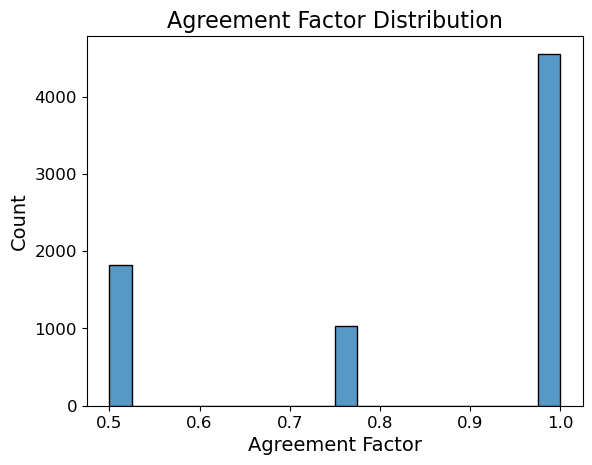

In [20]:
sns.histplot(data=cartography_df, x="agreement_factor_rd")
plt.title("Agreement Factor Distribution", fontsize=16)
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/agr_factor_hist.png", dpi=600, bbox_inches='tight')

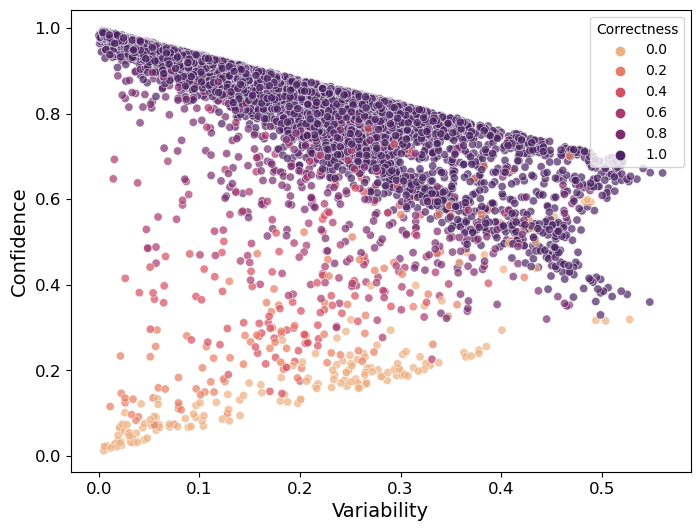

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Correctness', loc='upper right')
plt.savefig("./plots/conf_vs_var_color_correctness.png", dpi=600, bbox_inches='tight')

In [22]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.1683721274374961, pvalue=3.08487879653029e-48)

In [24]:
pearsonr(cartography_df[cartography_df['label']==1]['confidence'], cartography_df[cartography_df['label']==1]['agreement_factor_rd'])

PearsonRResult(statistic=0.3911837339083294, pvalue=1.0313399936832345e-135)